<a href="https://colab.research.google.com/github/surya81/Alma-better-projects/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**
$\color{blue}{\text{Bike Sharing Demand Prediction}}$

### **Project type** - Classification
### **Contribution** - Individual
### **Team Member1** - $\color{Green}{\text{Surya Prakash}}$

# **Project Summary**

**Data Processing**

    1.Importing libraries
    2.Function for reading dataset
    3.dataset information 
    4.Missing values,Duplicated values

**Exploratory Data Analysis**

**Supervised Machine learning Algorithm**

```
# This is formatted as code
```



# **Github Link**

https://github.com/surya81/Alma-better-projects/blob/main/Bike_Sharing_Demand_Prediction.ipynb

# **Problem Statement**

**Bike Rental has become an effective business, Nowdays lots of startups are becoming popular in bike rental business. however there are some difficulties which these comapnies are not able to resolve like a customer has to wait for a large amount of time in getting their bike Increase in waiting time can frustatea lot of customer to change their .However a company also have only have limited number of bike as their resources to share with people.So the companies must have to analyze how their customer are distributed.also it have to fluvtuate their prices seeing demand and suply**

# **Data overview and column description**


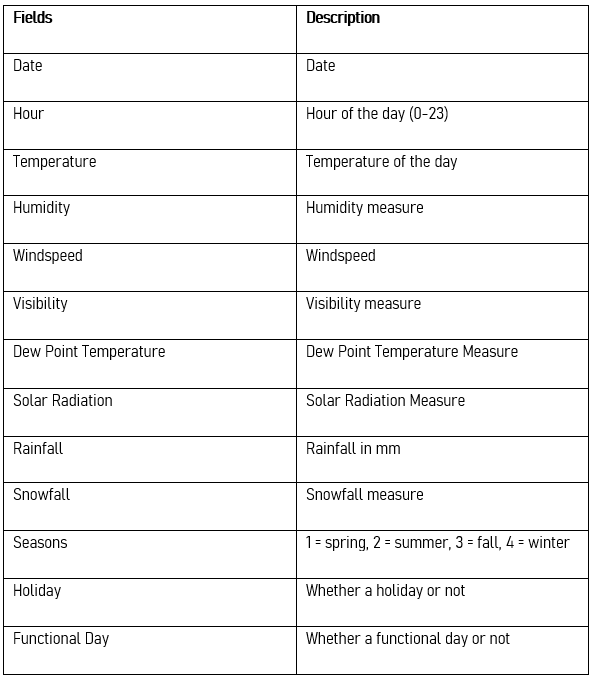

# **Let's Begin**

## **Import Libraries**

In [197]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## **Dataset Preprocesing**

### **Datset Loading**

In [198]:
# Function to load the data 
def DataLoader(path):
    """
    A function to load the datset 
    Argumet - Path(path to the data file)
    return - dataframe
    """
    try:
        dataframe = pd.read_excel(path,index_col='Date',parse_dates=['Date'])
        return dataframe
    except: # if path is incorrect or does not exist
        print("path does not find")

    finally:
        print("operation performed on the  dataset Location")


In [199]:
#call function to store datframe in bikedf dataframe
dataset =DataLoader('SeoulBikeDatas.xlsx') 

operation performed on the  dataset Location


### **Datset Description**

In [200]:
print(f"the dataset has toltal of  {dataset.shape[0]} rows and {dataset.shape[1]} columns") 

the dataset has toltal of  8760 rows and 13 columns


In [201]:
#seeing glimse of data 
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [202]:
#duplicated rows in data 
dupicated_data = dataset[dataset.duplicated()]
print(len(dupicated_data))

0


In [203]:
# Missing or Nan value across column in the dataset
print(print(dataset.isna().sum()))

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64
None


In [204]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-12-01 to 2018-11-30
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(4), objec

### **Variable description**

In [205]:
dataset.describe(include = "all")

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


**75 % of the rainfall and and snowfall vaues are 0. However we can't just remove them since rainfall is an important factor for tourist going for out side.**

In [206]:
def datacategory(dataframe):
    """ 
    A function To segragate the numerical and categorical columns data from pandas dataframe

    Argument- dataframe to which action is to performed

    returns - list of caetogriacl and numerical data 
    """
    categorical_data = []
    numerical_data= []
    for i in dataframe.columns.tolist():
        if dataframe[i].dtype =="O": # if data type of columns is object 
            categorical_data.append(i)

        else:
            numerical_data.append(i)
    print(f'total no of categorical data is {len(categorical_data)}')
    print(f'total no of numerical data is {len(numerical_data)}')

    return categorical_data, numerical_data

In [207]:
categorical_columns, numerical_columns = datacategory(dataset)

total no of categorical data is 3
total no of numerical data is 10


In [208]:
#print unique value in categorical value 
#since the dataset is large numerical value whose unique number are less than should be focussed

def print_values(dataframe):
    for i in dataframe.columns.tolist():
        if dataframe[i].dtype=='O':
            print(f"the categorical {i} have {dataframe[i].nunique()} unique values and they are{dataframe[i].unique()}")
        else:
            if dataframe[i].nunique() <=15:
                print(f"the numerical column {i} have {dataframe[i].nunique()} unique values and they are{dataframe[i].unique()}")


In [209]:
print_values(dataset)

the categorical Seasons have 4 unique values and they are['Winter' 'Spring' 'Summer' 'Autumn']
the categorical Holiday have 2 unique values and they are['No Holiday' 'Holiday']
the categorical Functioning Day have 2 unique values and they are['Yes' 'No']


## **Data wrangling**:

### **Data wrangling code**

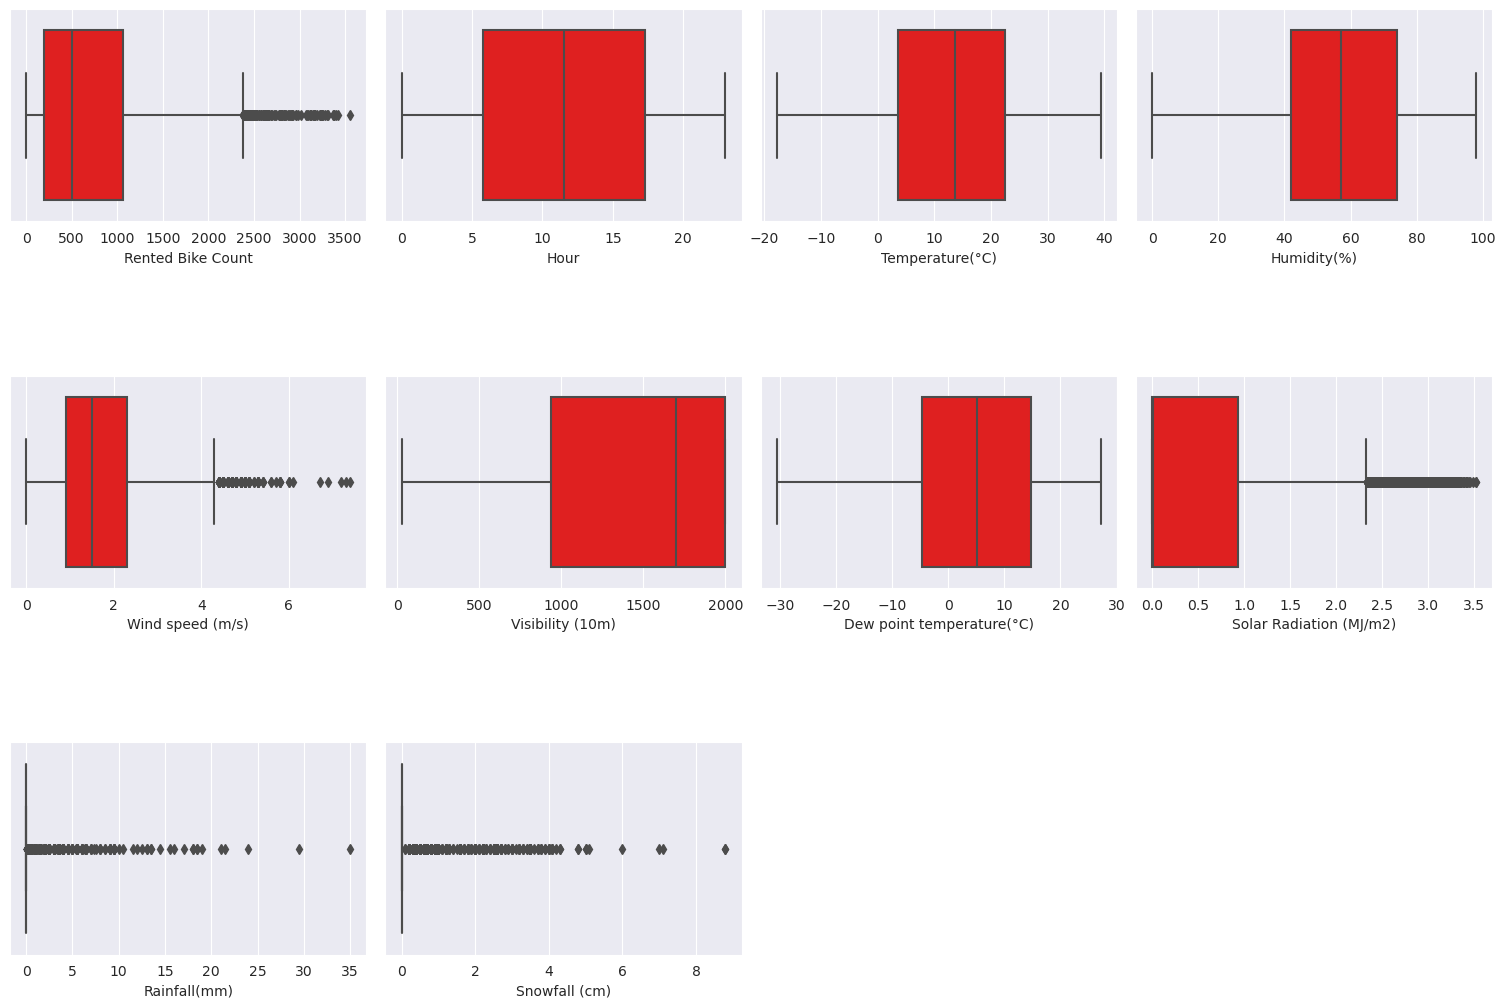

In [210]:
#see the outliers across the columns of the data 
# these plots are across the numerical dataset
fig = plt.figure(figsize = (15,10))
c=1
for i  in numerical_columns:
    plt.subplot(3,4,c)
    plt.xlabel(f"the distribution of {i} column")
    sns.boxplot(x = i,data = dataset,color = "red")
    c+=1

plt.tight_layout(pad= 0.4,w_pad = 0.5,h_pad =8.0)


#### **what all manipulation have we found**

**There are large number of oultlier across our target value also Ranall and snofall have larger number of values saturated around zero**

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

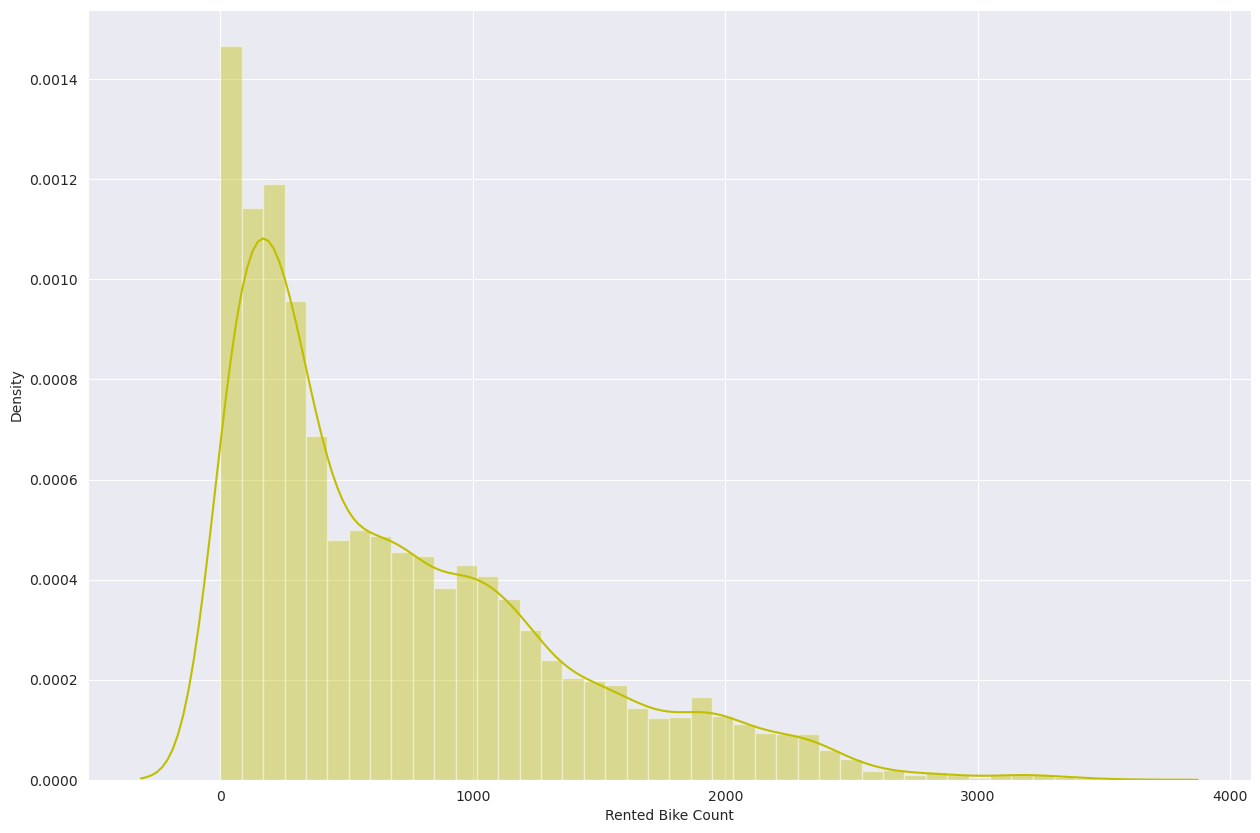

In [211]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(dataset['Rented Bike Count'],color="y")

<Axes: xlabel='Solar Radiation (MJ/m2)', ylabel='Density'>

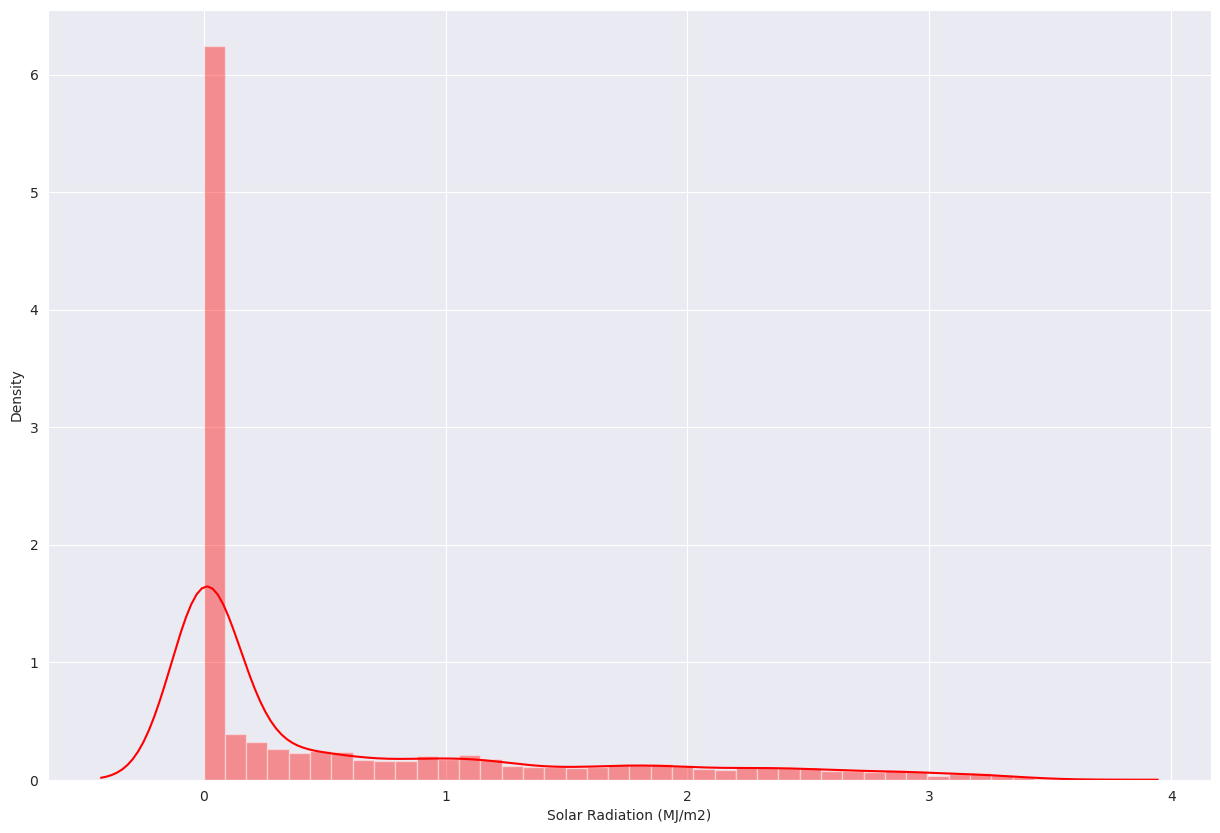

In [212]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(dataset['Solar Radiation (MJ/m2)'],color="r")

<Axes: xlabel='Wind speed (m/s)', ylabel='Density'>

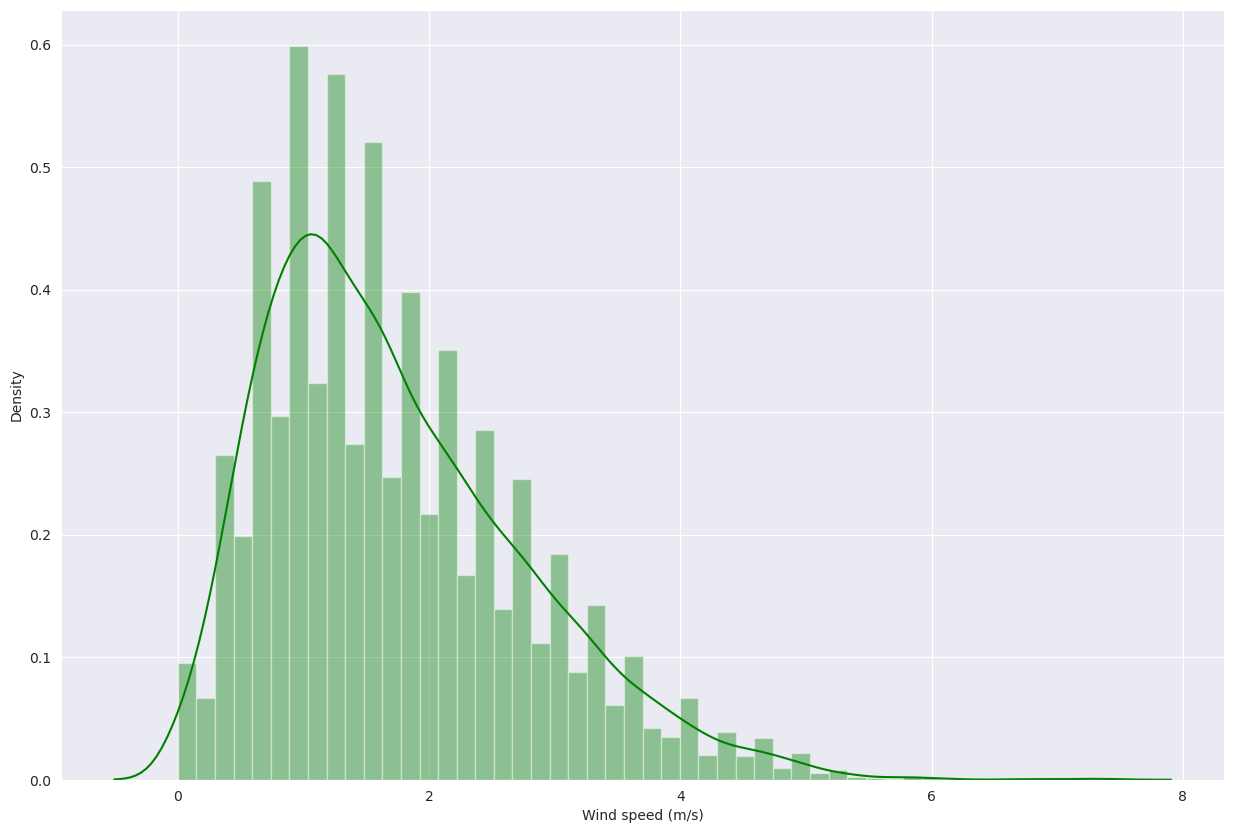

In [213]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(dataset['Wind speed (m/s)'],color="g")

#### What insight we found

**Based on the above three figure distribution we can conclude that wind speed solar radiation and rented bike count are left skewed so we can apply log transformation on them**

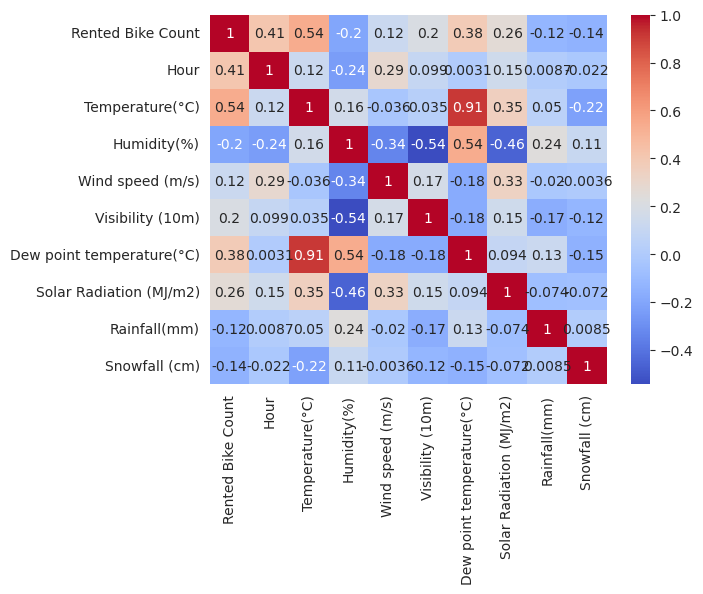

In [214]:
# since these hree of the figure are left seem related we should search for correlation between the data 
# Compute correlation matrix
corr_matrix = dataset.corr()
# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Insight 

**WE found out that some of the variable are highly correlated and removing them will only generalize our model**

In [215]:
dataset.drop('Dew point temperature(°C)',axis =1,inplace = True)

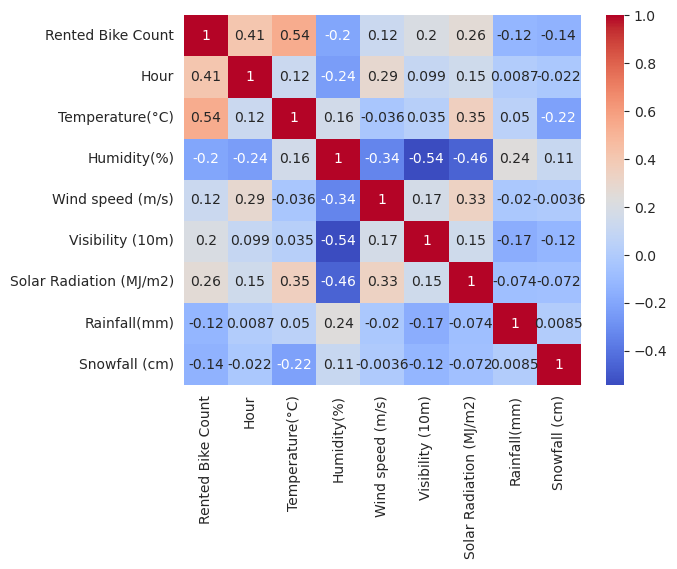

In [216]:
# since these hree of the figure are left seem related we should search for correlation between the data 
# Compute correlation matrix
corr_matrix = dataset.corr()
# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Humidity and visibility still have  wave very high negative correlation way they are affecting our
target variable in equal opposite way , so removing one would generalize our model**

In [217]:
dataset.drop('Visibility (10m)',axis =1,inplace =True)

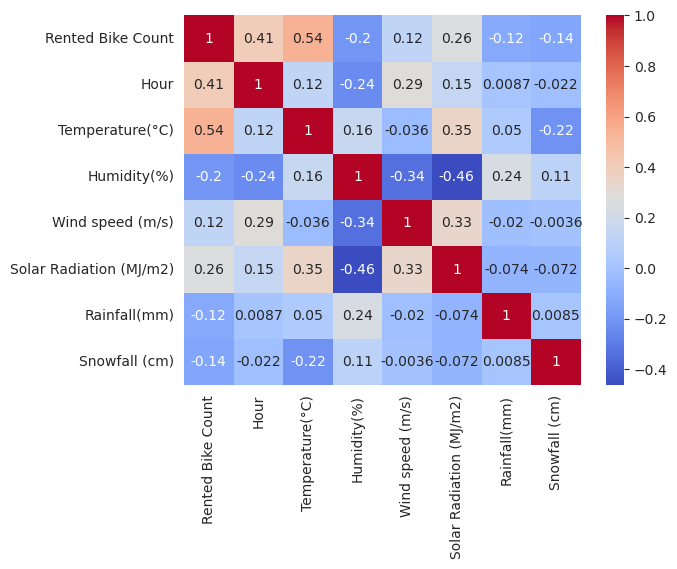

In [218]:
corr_matrix = dataset.corr()
# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Data Undertanding

<Axes: xlabel='Date'>

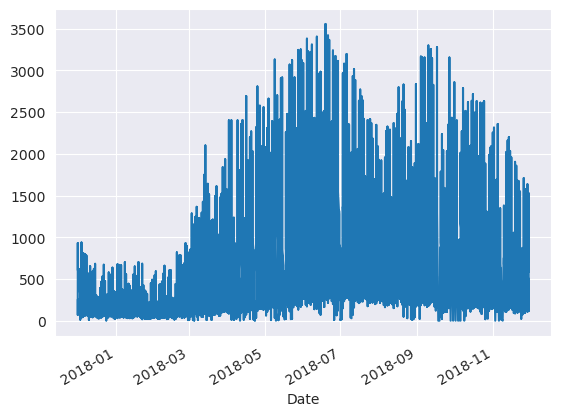

In [219]:
dataset["Rented Bike Count"].plot()

**Rent count of data seems to be higher in month  of july however my seem to find the rent count on weekdays and weekends**

#### New variabele

**We will create new variable for weekdays and weekends to see if the proportion bikes on weekends and weekdays**

In [220]:
#days= {0:'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday', 6:'Sunday'}
dataset["days of week"] = dataset.index.weekday

In [221]:
#creating a function for hour to divide the hours column in to day noon evening and night 
def time_of_day(dataset):
    if dataset>=6 and dataset<=11:
        return  "Morning"	
        
    elif dataset >11 and dataset<16:
        return "Noon"
        
    
    elif dataset >=16 and dataset <=21:
        return "Evening"
        
    elif dataset >21 and  dataset >=23:
        return "Night"
        
    else:
        return "sleep time"

In [222]:
#creating a function for Tempreture of the day to divide in different segments  
def temprature_of_day(dataset):
    if dataset>=4 and dataset<=15:#when tempreture is between 4 and 15 degree celcius
        return  "cold day"	
        
    elif dataset >15 and dataset<25:#when tempretture is between 15 and 25 degree celcius
        return "cool day  "
        
    
    elif dataset >=25 and dataset <=40:#when tempreture is between 25 and 40 celcius
        return "Normal day"
        
    elif dataset >40 : #when tempreture is above 40 degree celcius
        return "High tempreture day"
        
    else: #when tempreture is below 4  degree celcius
        return "extremy cold days"

In [223]:
#Since most(75%) of the rainfall mm are zero we ca categorize the column as either rainfall or not rainfall 
dataset["Rainfall(mm)"] = dataset["Rainfall(mm)"].apply(lambda x : "No Rainfaill"if x==0 else "Rainfall")

In [224]:
#Since most(75%) of the snowfall mm are zero we ca categorize the column as either snowfall or not snowfall 
dataset["Snowfall (cm)"] = dataset["Snowfall (cm)"].apply(lambda x : "No Snowfall "if x==0 else "Snowfall (cm)")

#### Univariate Analysis


In [225]:

dataset.groupby("days of week")["Rented Bike Count"].mean()

days of week
0    730.563301
1    687.977564
2    740.349359
3    690.704327
4    741.941680
5    714.496759
6    625.155449
Name: Rented Bike Count, dtype: float64

**The Mean values shows that are bike are rented on alternative day most one of reason for this will
may  be that people are opting for hybrid officw working where 3 days they go to office and 3 days home 
also lowest bik rented on is on sunday reson may be for that people like to relax on sundays at home** 

In [226]:
dataset["time_of_day"] = dataset["Hour"].apply(time_of_day)

In [227]:

dataset.groupby("time_of_day")["Rented Bike Count"].mean()

time_of_day
Evening       1144.603196
Morning        613.988128
Night          671.126027
Noon           755.174658
sleep time     381.010959
Name: Rented Bike Count, dtype: float64

**It show that most of the bike are rented in evening time around 9 coock"**

**Also when people are sleeping at 1-3 clock in mornings bike demands are very less**

In [228]:
dataset["tempreture_of_day"] = dataset["Temperature(°C)"].apply(temprature_of_day)

In [229]:
dataset.groupby("tempreture_of_day")["Rented Bike Count"].mean()

tempreture_of_day
Normal day           1185.525147
cold day              579.672937
cool day              946.234749
extremy cold days     239.422609
Name: Rented Bike Count, dtype: float64

**As expected bike counts are more when days are normal the one of the reason for this can may be that because days are normal of normal tempreture all the peoples will be easily active and available for work**

In [230]:
#see how many functioning days are total 
dataset["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [231]:
# aggregate average count of bike rented when there functioning day or not 
dataset.groupby("Functioning Day")["Rented Bike Count"].mean()

Functioning Day
No       0.000000
Yes    729.156999
Name: Rented Bike Count, dtype: float64

**We can see that when day is not a functioning day the rent bike count is zero so we can directly omit the row and also the Functioning days column itself**

In [232]:
#select only those rows where functioning days are yes 
dataset= dataset[dataset["Functioning Day"]=="Yes"]

In [233]:
dataset.drop("Functioning Day",inplace =True,axis =1)

In [234]:
#counts of people using Rented bike when there is rainfall
dataset.groupby("Rainfall(mm)")["Rented Bike Count"].mean()

Rainfall(mm)
No Rainfaill    765.632029
Rainfall        167.257752
Name: Rented Bike Count, dtype: float64

**Average bike count is 7 times when there is no Raifall**

**One of the main reason for using less bike will may because people tend to use four wheeler or stay at home when there is rainafall**

In [235]:
#counts of people using Rented bike when there is Snowfall
dataset.groupby("Snowfall (cm)")["Rented Bike Count"].mean()

Snowfall (cm)
No Snowfall      759.201446
Snowfall (cm)    185.101580
Name: Rented Bike Count, dtype: float64

**Again we can see that snowfall have major drawback Rented bike user**
**People tend to use roofed or covered vehicle when there is snowfall**

In [236]:
#season effect on rented bikes 
dataset.groupby("Seasons")["Rented Bike Count"].mean()

Seasons
Autumn     924.110480
Spring     746.254167
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

**people use Rented bike most when the temreture are either warm or normal**

**In winter Bike are very less compared to any other seasons**

In [237]:
#Holiday effect on rented bikes 
dataset.groupby("Holiday")["Rented Bike Count"].mean()

Holiday
Holiday       529.154412
No Holiday    739.284970
Name: Rented Bike Count, dtype: float64

**People use more Rented bike on No holidays as compared to Holidays**

#### Biariate Analysis

In [238]:
dataset.groupby(["Rainfall(mm)","Snowfall (cm)"])["Rented Bike Count"].mean()

Rainfall(mm)  Snowfall (cm)
No Rainfaill  No Snowfall      797.275949
              Snowfall (cm)    191.161446
Rainfall      No Snowfall      171.387295
              Snowfall (cm)     95.285714
Name: Rented Bike Count, dtype: float64

In [239]:
dataset.groupby(["Seasons","tempreture_of_day"])["Rented Bike Count"].mean()

Seasons  tempreture_of_day
Autumn   Normal day           1559.480916
         cold day              788.627322
         cool day             1082.600840
         extremy cold days     514.909605
Spring   Normal day           1605.695652
         cold day              524.683236
         cool day             1091.936694
         extremy cold days     290.638298
Summer   Normal day           1145.219821
         cool day              861.834873
Winter   cold day              352.705882
         extremy cold days     207.220869
Name: Rented Bike Count, dtype: float64

**Bike rented are highest in spring seasons when daystempreture are normal**

**This is expected as people tend to use bike more there is normal tempreture and season is spring**

#### Summary

## Data Vsualization 

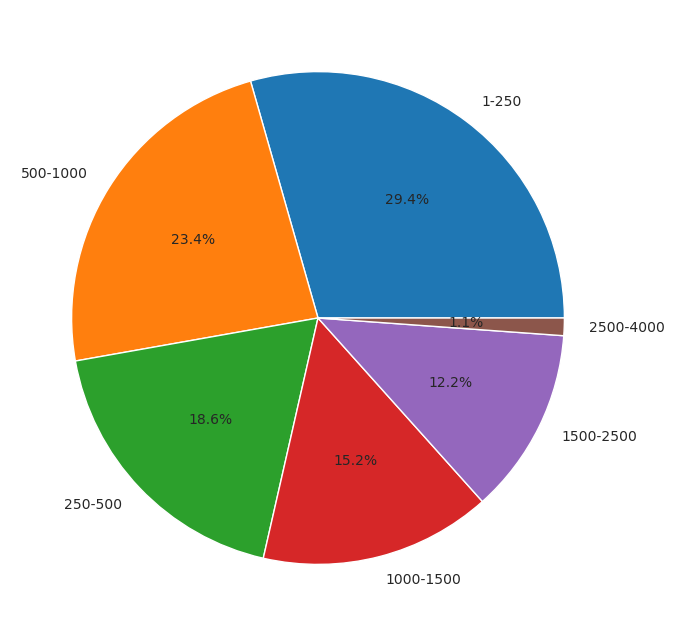

In [240]:
# we will plot the distribution Rented bike data by dividing the bike rented count among distributions

# Set the size of the figure to 10 inches wide by 8 inches tall
plt.figure(figsize=(10,8))

# Divide the data into categories
bins = [1, 250,500,1000,1500, 2500,4000]

# Use the `cut` function to assign each data point to a category
categories = pd.cut(dataset["Rented Bike Count"], bins, labels=["1-250", "250-500", "500-1000","1000-1500","1500-2500","2500-4000"])

# Count the number of data points in each category
counts = categories.value_counts()

# Plot the data as a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()


#### why pie chart

**We make pie chart to demonstrate the distribution of a bike Reted in a range,on a certain day**

**The rented bike has been sorted in a commulative distribution range**

#### Insights  Found 

**we found out that large proportion of the bike rented lies n therange of 0-250 , than 500-100
it is strange that Bike ratio is less in range of 250-500**

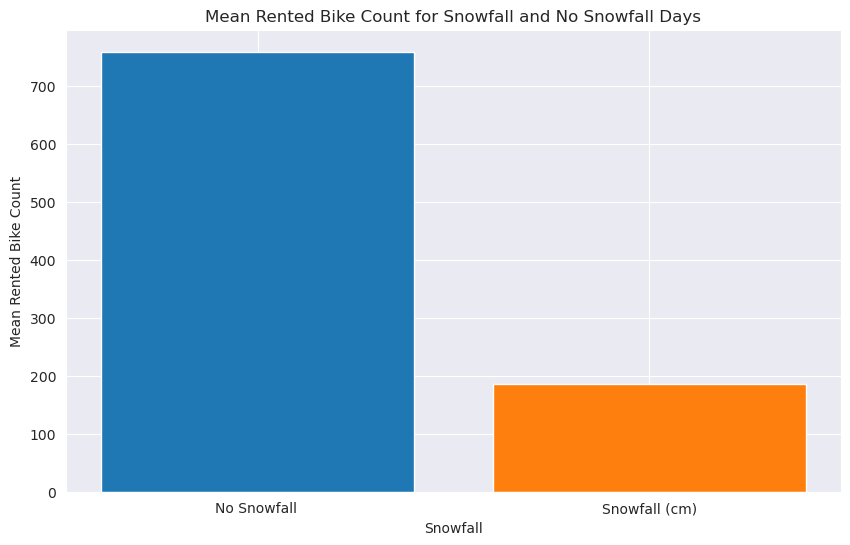

In [241]:

# Group the data by "Snowfall (cm)" column and calculate the mean of "Rented Bike Count"
snowfall_rental_mean = dataset.groupby(dataset["Snowfall (cm)"])["Rented Bike Count"].mean()

# Set the plot style
sns.set_style("darkgrid")
colors = ['#1f77b4', '#ff7f0e']
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
ax.bar(snowfall_rental_mean.index.astype(str), snowfall_rental_mean.values, color=colors)

# Set the plot title and labels
ax.set_title("Mean Rented Bike Count for Snowfall and No Snowfall Days")
ax.set_xlabel("Snowfall")
ax.set_ylabel("Mean Rented Bike Count")

# Display the plot
plt.show()


#### why bar chart 

**A bar chart is an appropriate type of plot for this data because we are comparing two categories, "Snowfall" and "No Snowfall", and their mean values of the "Rented Bike Count" column. A bar chart uses rectangular bars to represent the values of each category, which makes it easy to visually compare the values of the two categories.
In this case, a bar chart allows us to see how the mean rented bike count differs between "Snowfall" and "No Snowfall" days. The x-axis can be labeled as "Snowfall" and "No Snowfall", and the y-axis can be labeled as "Mean Rented Bike Count". Each bar represents the mean value of the "Rented Bike Count" for the corresponding category. We can also add error bars or confidence intervals to the bars to show the variability of the mean values.
Therefore, a bar chart is an effective and appropriate way to visualize this data and compare the mean rented bike count between "Snowfall" and "No Snowfall" days.**

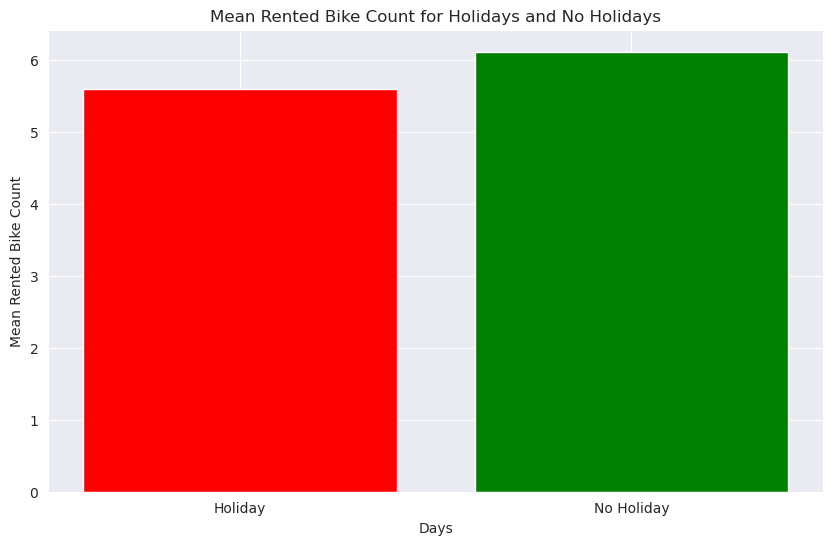

In [254]:
# Group the data by "Snowfall (cm)" column and calculate the mean of "Rented Bike Count"
Holidays_rental_mean = dataset.groupby(dataset["Holiday"])["Rented Bike Count"].mean()

# Set the plot style
sns.set_style("darkgrid")
colors = ['r', 'g']
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
ax.bar(Holidays_rental_mean.index.astype(str), Holidays_rental_mean.values, color=colors)

# Set the plot title and labels
ax.set_title("Mean Rented Bike Count for Holidays and No Holidays")
ax.set_xlabel("Days")
ax.set_ylabel("Mean Rented Bike Count")

# Display the plot
plt.show()

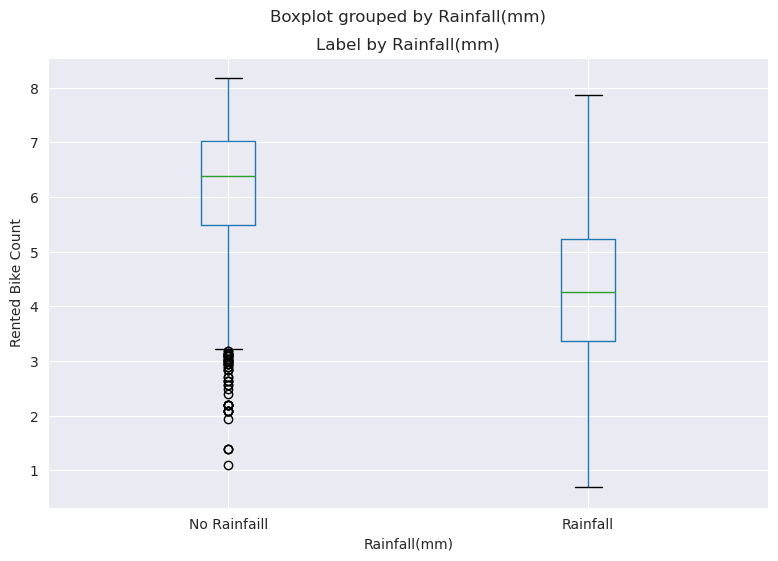

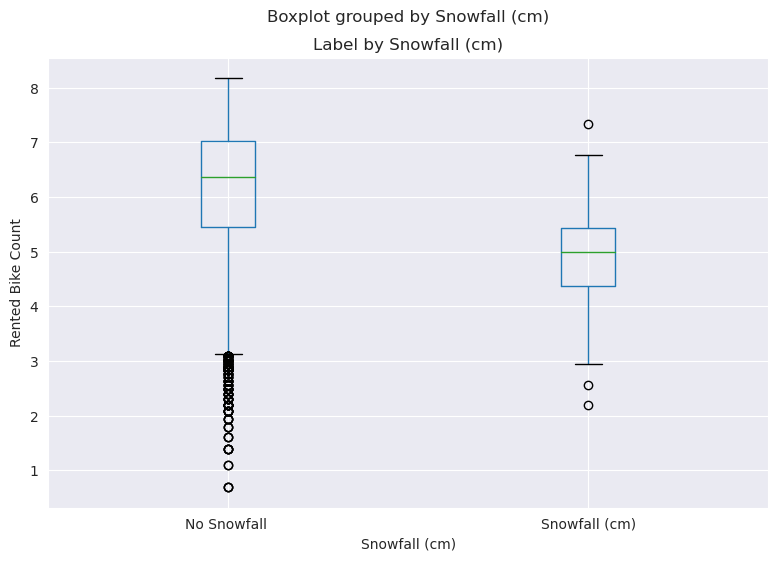

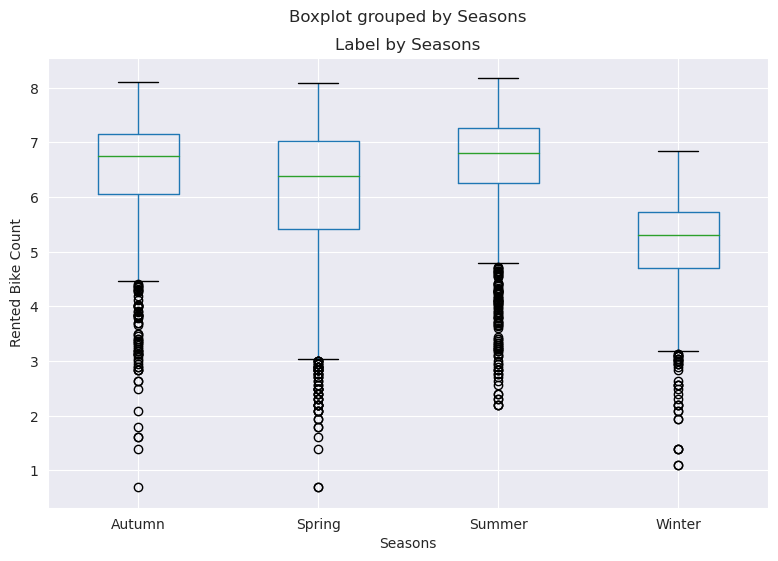

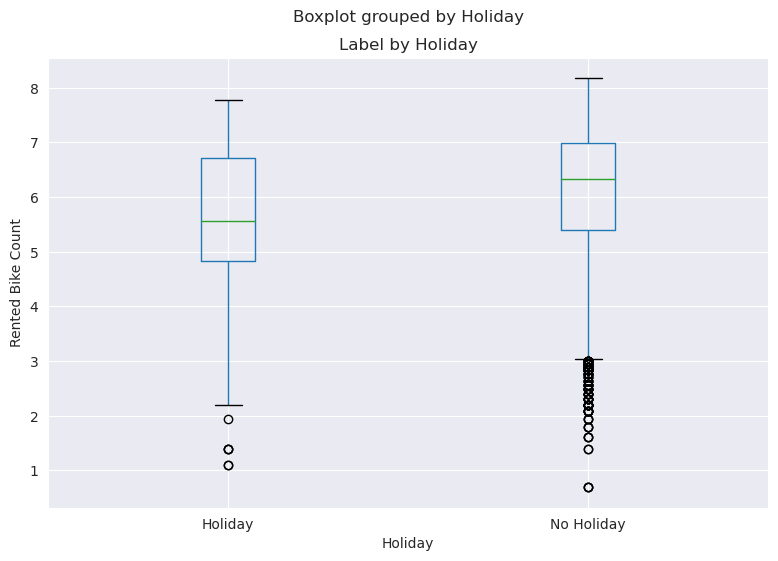

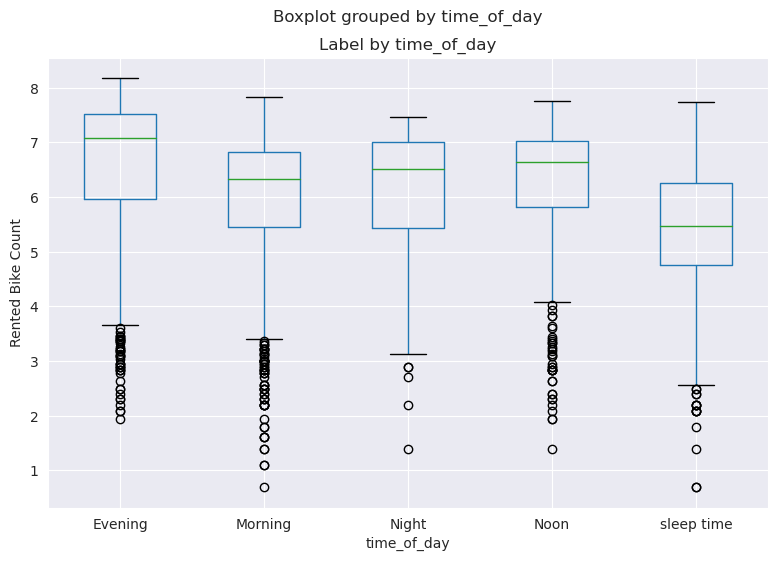

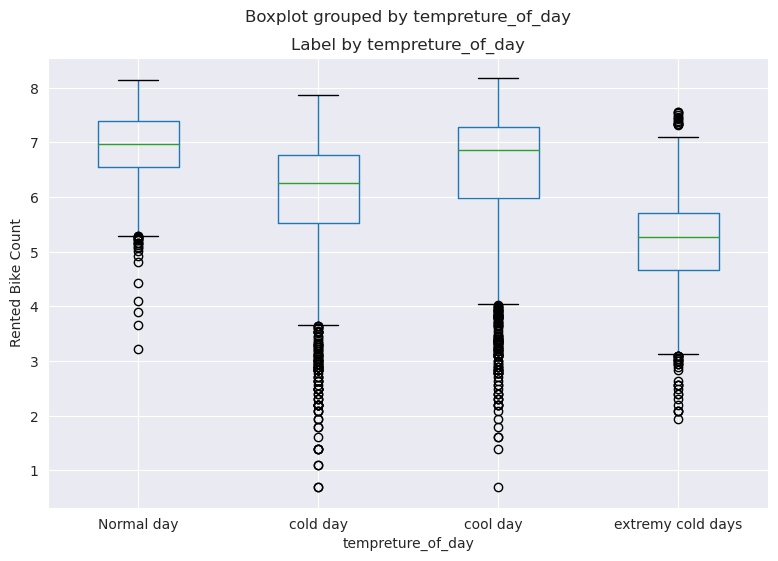

In [263]:
# for i in dataframe.columns.tolist():
#if dataframe[i].dtype =="O":
categorical_features = [i for i in dataset.columns.tolist() if dataset[i].dtype =="O"]
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

#### Why Boxplot

**Boxplots are a useful way to visualize the distribution of a continuous variable (in this case, "Rented Bike Count") across different categories (in this case, the categorical variables in the dataset).
Boxplots display the median, the interquartile range (IQR), and any outliers in a distribution. The median is represented by the horizontal line in the box, the IQR is the box itself (with the upper and lower edges representing the 75th and 25th percentiles, respectively), and the whiskers extend to the maximum and minimum values that are not considered outliers. Outliers are plotted as individual points beyond the whiskers.
By creating boxplots of "Rented Bike Count" for each category in the dataset, we can easily compare the distribution of the variable across categories and identify any differences or similarities. For example, we can see if there are any categories where the median or IQR of "Rented Bike Count" is noticeably different from other categories, or if there are any categories with a large number of outliers. This information can be useful for identifying patterns or relationships in the data and can inform further analysis or modeling.**

## Dataset Manipulation

In [245]:
# we will Remove skewnessirty of the columns
def transform_column(column):
    """
    Argument = column on whch we try to apply the transform 
    returns - same column with transformed column 
    """
    try :
        # Dependent variable 'Price'
        plt.figure(figsize=(15,10))
        sns.distplot(np.log(dataset[column]+1),color="y")
        dataset[column]= np.log(dataset[column])
        
    except :
        print("The column does not exist")

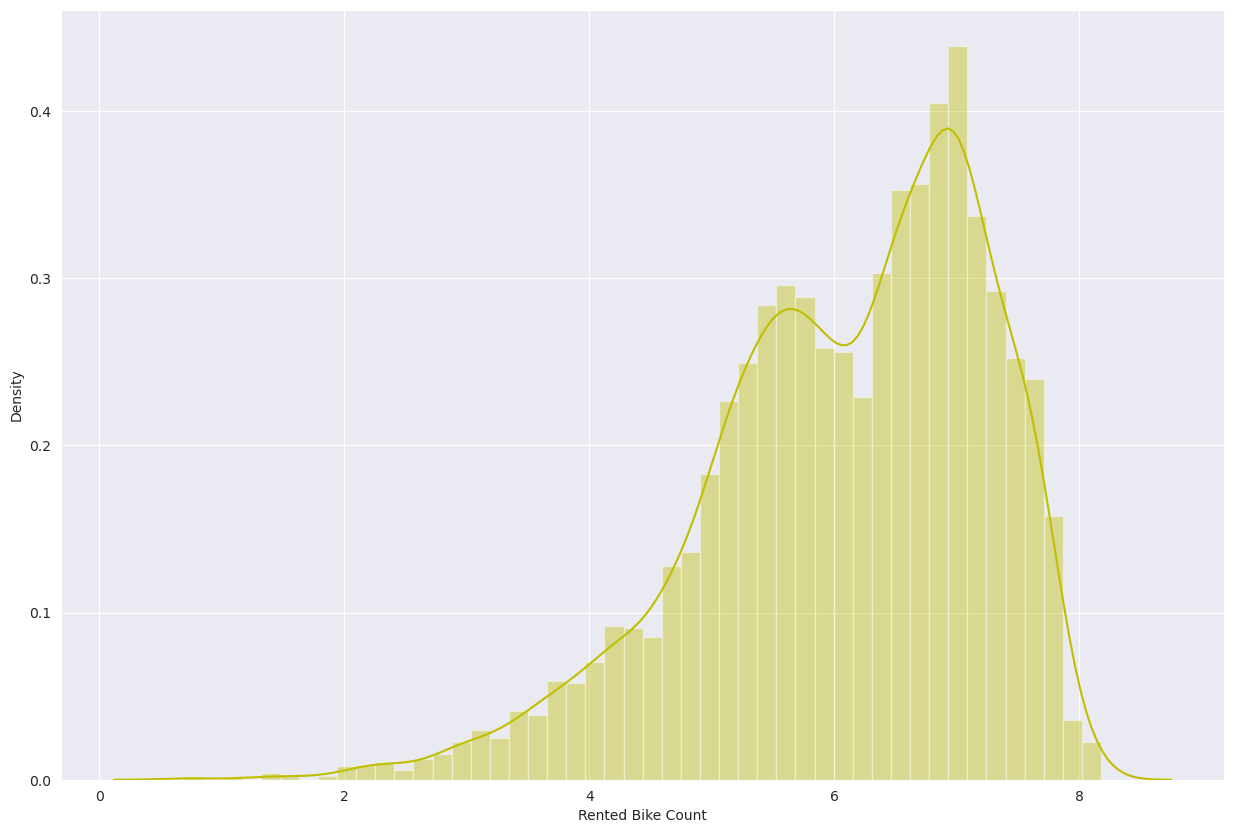

In [243]:
#ataset['Rented Bike Count']
transform_column("Rented Bike Count")

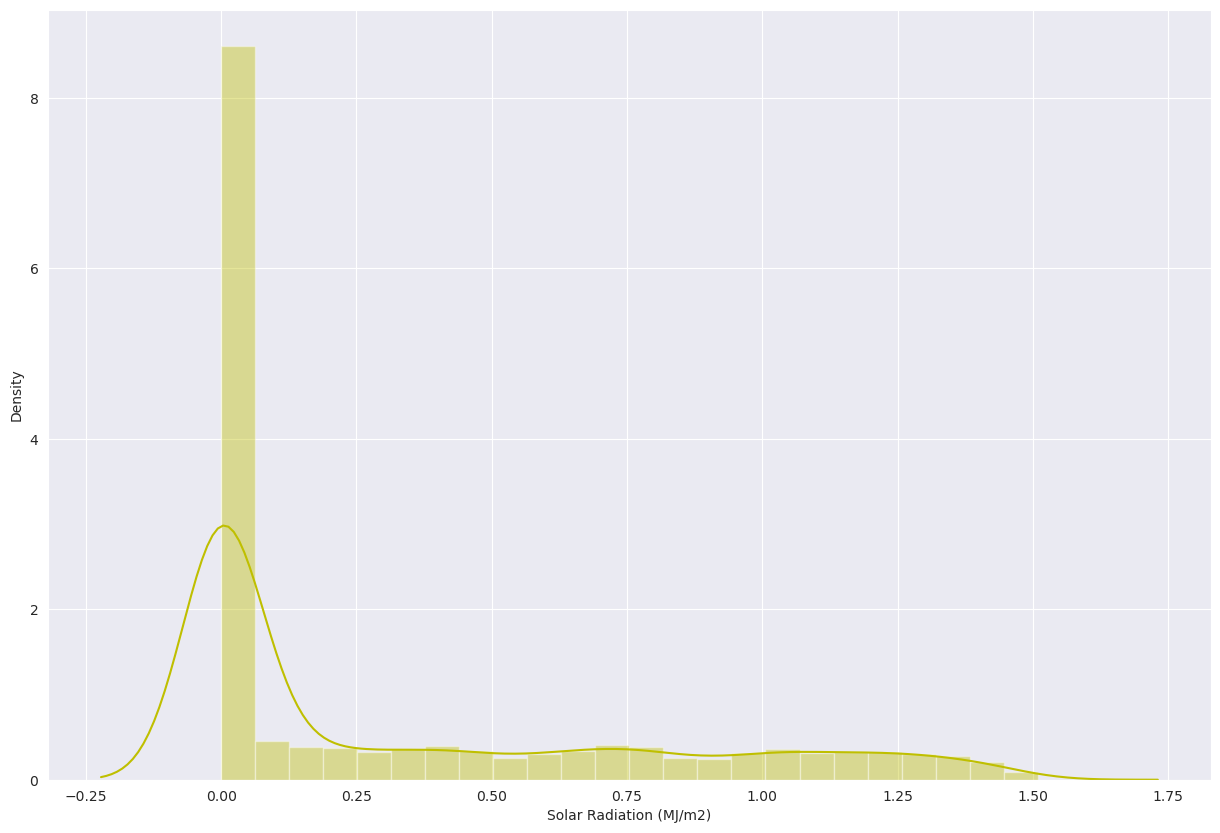

In [246]:
transform_column("Solar Radiation (MJ/m2)")

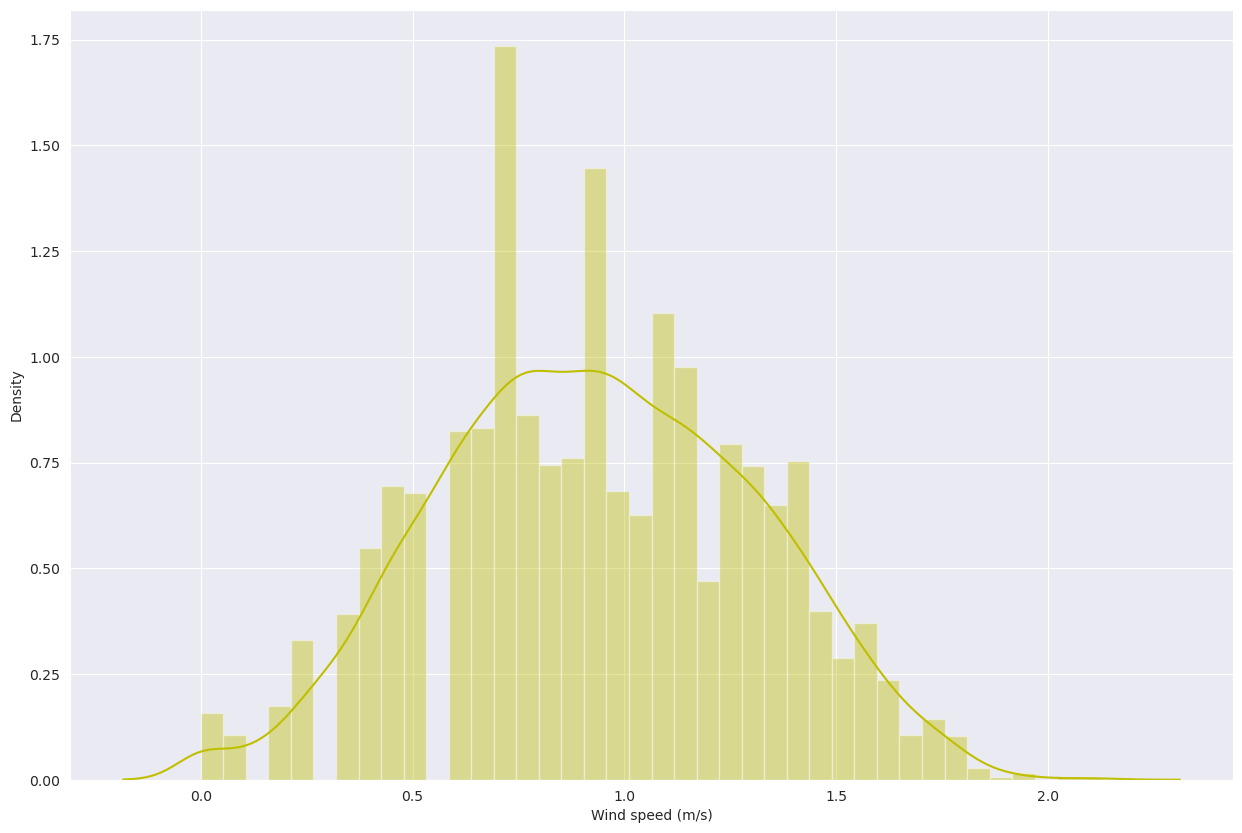

In [247]:
transform_column("Wind speed (m/s)")

In [250]:
#Since solar radiation have most of the value as zero we could afford to drop the column 
dataset.drop("Solar Radiation (MJ/m2)",axis=1,inplace=True)

In [253]:
dataset.describe(include = "all")

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Rainfall(mm),Snowfall (cm),Seasons,Holiday,days of week,time_of_day,tempreture_of_day
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465,8465,8465,8465,8465.000000,8465,8465
unique,NaN,NaN,NaN,NaN,NaN,2,2,4,2,NaN,5,4
top,NaN,NaN,NaN,NaN,NaN,No Rainfaill,No Snowfall,Summer,No Holiday,NaN,sleep time,cool day
freq,NaN,NaN,NaN,NaN,NaN,7949,8022,2208,8057,NaN,2465,2433
mean,6.087200,11.507029,12.771057,58.147194,-inf,NaN,NaN,NaN,NaN,3.008033,NaN,NaN
std,1.163071,6.920899,12.104375,20.484839,NaN,NaN,NaN,NaN,NaN,2.007355,NaN,NaN
min,0.693147,0.000000,-17.800000,0.000000,-inf,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,5.365976,6.000000,3.000000,42.000000,-0.105361,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
50%,6.295266,12.000000,13.500000,57.000000,0.405465,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
75%,6.988413,18.000000,22.700000,74.000000,0.832909,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [257]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [260]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID']]])

LinAlgError: SVD did not converge

In [261]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2017-12-01 to 2018-11-30
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8465 non-null   float64
 1   Hour               8465 non-null   int64  
 2   Temperature(°C)    8465 non-null   float64
 3   Humidity(%)        8465 non-null   int64  
 4   Wind speed (m/s)   8465 non-null   float64
 5   Rainfall(mm)       8465 non-null   object 
 6   Snowfall (cm)      8465 non-null   object 
 7   Seasons            8465 non-null   object 
 8   Holiday            8465 non-null   object 
 9   days of week       8465 non-null   int64  
 10  time_of_day        8465 non-null   object 
 11  tempreture_of_day  8465 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.1+ MB
